In [1]:
# Tested on python 3.6.4 
%matplotlib inline
import numpy as np # 1.13.3
import matplotlib.pyplot as plt # 2.1.1
import pandas as pd # 0.22.0
import seaborn as sns # 0.8.1
from cycler import cycler # 0.10.0
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator

# Directories defined here 
DIR_DATA = './data/'
DIR_PLOTS = './plots/'
DIR_OUT = './output/'

This jupyter notebook generates bar plots in Figures 4 and 5A-B for the 2018 Swank et al. paper. It uses the following data files, which are located in `DIR_DATA`:

    repressor_1site_FR.csv
    repressor_1site_KD.csv
    repressor_2site_FR.csv
    repressor_2site_KD.csv
    repressor_1siteslidedwn_FR.csv
    repressor_1siteslideup_FR.csv
    repressor_1siteslide_KD.csv
    repressor_platereader.csv
    
Plots are written into `DIR_PLOTS`.

## Plot 1 site data, FR ordered 

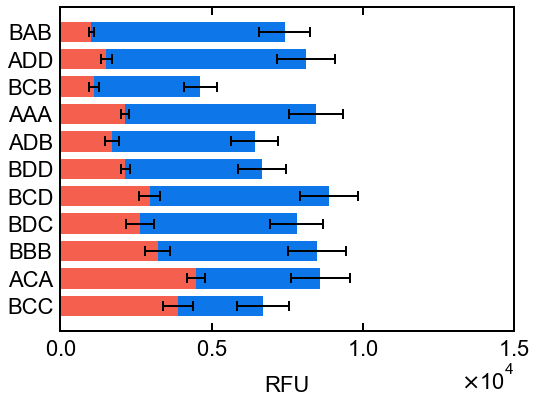

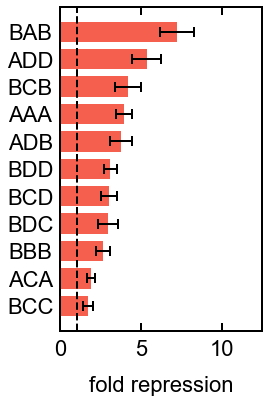

In [25]:
df = pd.read_csv(DIR_DATA+'repressor_1site_FR.csv',delimiter=',',index_col=0)
df2 = pd.read_csv(DIR_DATA+'repressor_1site_KD.csv',delimiter=',',index_col=0)
df.sort_values(by=['FR'],inplace=True,ascending=True)
df2 = df2.reindex(df.index)
# We use df2 index values to label all plots

#############################
##### PLOT FLUORESCENCE #####
#############################

plt.close("all")

my_dpi=150

figure_options={'figsize':(9,6)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95)

######### CALL PLOTS #########

length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.barh(ind,df['CBD-bkg'],width,xerr=[df['CBD-bkgstd'],df['CBD-bkgstd']],
       align='edge', color='#0d76e8',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Unrepressed')

ax.barh(ind,df['ZF-bkg'],width,xerr=[df['ZF-bkgstd'],df['ZF-bkgstd']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Repressed')

######### FORMAT #########
ax.set_xlim([0,15000])
ax.set_yticks(ind+width/2)
ax.set_xticks([0,0.5e4,1e4,1.5e4])
ax.set_yticklabels(df2.index,rotation=0,ha='center')
ax.set_xlabel('RFU', labelpad=16)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
ax.tick_params(which='major', width=2, length=8,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=30)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0),useMathText=True)

######### CALL LEGEND #########
#ax.legend(loc='lower right', fontsize=16,numpoints=1)

plt.savefig(DIR_PLOTS+'plot_1site_levels.pdf',dpi=my_dpi,transparent=True)
plt.show()


#################################
##### PLOT FOLD REPRESSION  #####
#################################

plt.close("all")

my_dpi=150

figure_options={'figsize':(4,6)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95)

######### CALL PLOTS #########

# Bar charts
length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.barh(ind,df['FR'],width,xerr=[df['FRstd'],df['FRstd']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2))

######### FORMAT #########
ax.set_xlim([0,12.5])
ax.set_yticks(ind+width/2)
ax.set_yticklabels(df2.index,rotation=0,ha='center')
ax.set_xlabel('fold repression', labelpad=16)    
ax.axvline(x=1,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
ax.tick_params(which='major', width=2, length=8,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=30)

plt.savefig(DIR_PLOTS+'plot_1site_FRh.pdf',dpi=my_dpi,transparent=True)
plt.show()



## Plot 2 site data 

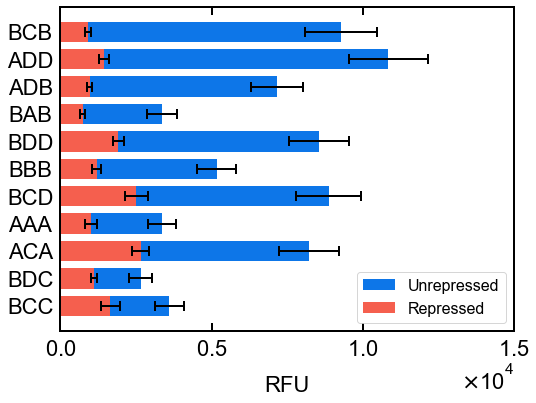

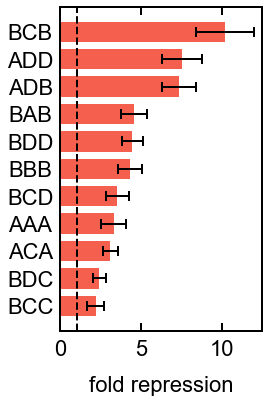

In [23]:
df = pd.read_csv(DIR_DATA+'repressor_2site_FR.csv',delimiter=',',index_col=0)
df2 = pd.read_csv(DIR_DATA+'repressor_2site_KD.csv',delimiter=',',index_col=0)
ind1 = ['1BCC2','1ACA2','1BBB2','1BDC2','1BCD2','1BDD2','1ADB2','1AAA2','1BCB2','1ADD2','1BAB2'] 
df.sort_values(by=['FR'],inplace=True,ascending=True)
df2 = df2.reindex(df.index)
# We use df2 index values to label all plots

############################
##### PLOT FLUORESCENCE ####
############################

plt.close("all")

my_dpi=150

figure_options={'figsize':(9,6)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95)

######### CALL PLOTS #########

# Bar charts
length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.barh(ind,df['CBD-bkg'],width,xerr=[df['CBD-bkgstd'],df['CBD-bkgstd']],
       align='edge', color='#0d76e8',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Unrepressed')

ax.barh(ind,df['ZF-bkg'],width,xerr=[df['ZF-bkgstd'],df['ZF-bkgstd']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Repressed')

######### FORMAT #########

ax.set_xlim([0,15000])
ax.set_yticks(ind+width/2)
ax.set_xticks([0,0.5e4,1e4,1.5e4])
ax.set_yticklabels(df2.index,rotation=0,ha='center')
ax.set_xlabel('RFU', labelpad=16)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
ax.tick_params(which='major', width=2, length=8,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=30)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0),useMathText=True)

######### CALL LEGEND #########
ax.legend(loc='lower right', fontsize=16,numpoints=1)

plt.savefig(DIR_PLOTS+'plot_2site_levelsH.pdf',dpi=my_dpi,transparent=True)
plt.show()


################################
##### PLOT FOLD REPRESSION #####
################################


plt.close("all")

my_dpi=150

figure_options={'figsize':(4,6)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95)

######### CALL PLOTS #########

length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.barh(ind,df['FR'],width,xerr=[df['FRstd'],df['FRstd']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2))

######### FORMAT #########

ax.set_xlim([0,12.5])
ax.set_yticks(ind+width/2)
ax.set_yticklabels(df2.index,rotation=0,ha='center')
ax.set_xlabel('fold repression', labelpad=16)   
ax.axvline(x=1,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
ax.tick_params(which='major', width=2, length=8,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='false',bottom='true',left='false')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=30)

plt.savefig(DIR_PLOTS+'plot_2site_FRh.pdf',dpi=my_dpi,transparent=True)
plt.show()


## Plot 1 site sliding 

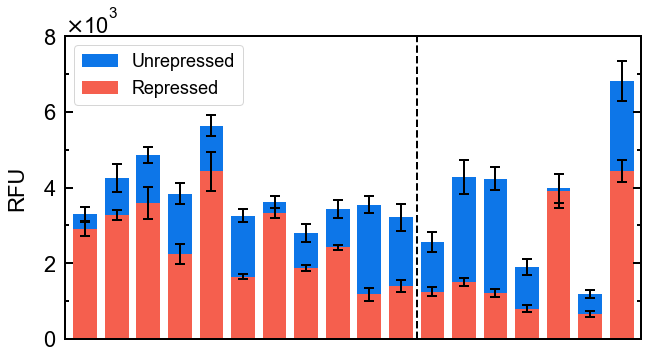

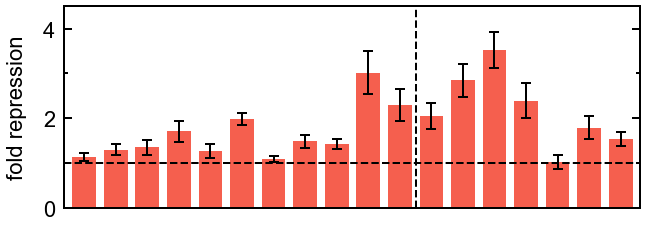

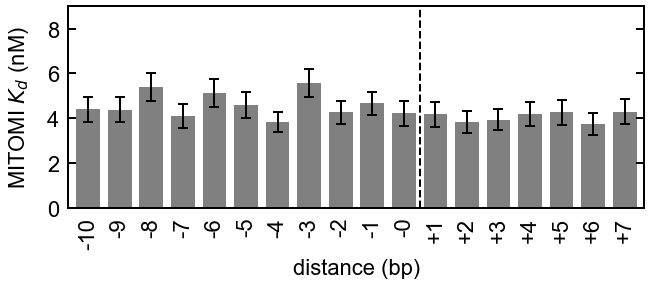

In [28]:
df0 = pd.read_csv(DIR_DATA+'repressor_1siteslidedwn_FR.csv',delimiter=',',index_col=0)
df1 = pd.read_csv(DIR_DATA+'repressor_1siteslideup_FR.csv',delimiter=',',index_col=0)
# Reverse first df, concatenate and reverse final df
rev0df = pd.concat([df0.reindex(index=df0.index[::-1]),df1])
df = rev0df.reindex(index=rev0df.index[::-1])
df2 = pd.read_csv(DIR_DATA+'repressor_1siteslide_KD.csv',delimiter=',',index_col=0)
# We use df2 index values to label all plots

#############################
##### PLOT FLUORESCENCE #####
#############################

plt.close("all")

my_dpi=150

figure_options={'figsize':(10,6)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
#fig=plt.figure(); ax=fig.add_subplot(2,1,1)
fig,ax=plt.subplots()
plt.subplots_adjust(left=0.15,bottom=0.25,right=0.95,top=0.95)

labels=['-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','-0','+1','+2','+3','+4','+5','+6','+7']

######### CALL PLOTS #########

# Bar charts
length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.bar(ind,df['CBD-bkg'],width,yerr=[df['CBD-bkgstd'],df['CBD-bkgstd']],
       align='edge', color='#0d76e8',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Unrepressed') #f55f4e red #0d76e8 blue

ax.bar(ind,df['ZF-bkg'],width,yerr=[df['ZF-bkgstd'],df['ZF-bkgstd']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Repressed') #f55f4e red #0d76e8 blue

######### FORMAT #########
ax.set_xlim([-0.25,length])
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels,rotation=0,ha='center',visible=False) #df2.index
ax.set_yticks([0,2e3,4e3,6e3,8e3])
ax.set_ylabel('RFU', labelpad=16)
ax.axhline(linewidth=2, color='k')     
ax.axvline(x=((10+width/2)+(11+width/2))/2,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(which='major', width=2, length=8,direction='in',top='false',right='true',bottom='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='true')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=9)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)

######### CALL LEGEND #########
ax.legend(loc='upper left', fontsize=18,numpoints=1)

plt.savefig(DIR_PLOTS+'plot_1siteslide_levels.pdf',dpi=my_dpi,transparent=True)
plt.show()

################################
##### PLOT FOLD REPRESSION #####
################################

plt.close("all")

my_dpi=150

figure_options={'figsize':(10,4)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
plt.subplots_adjust(left=0.15,bottom=0.25,right=0.95,top=0.95)

######### CALL PLOTS #########

# Bar charts
length=len(df.iloc[:,0])
ind=np.arange(length)
width=0.75

ax.bar(ind,df['FR'],width,yerr=[df['FRstd'],df['FRstd']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2))#,label='BCB-ADD') #f55f4e red #0d76e8 blue

######### FORMAT #########
ax.set_xlim([-0.25,length])
ax.set_ylim([0,4.5])
ax.set_xticks([])
ax.set_ylabel('fold repression', labelpad=16)
ax.axhline(linewidth=2, color='k')  
ax.axvline(x=((10+width/2)+(11+width/2))/2,linewidth=2, color='k',ls='--')
ax.axhline(y=1,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(which='major', width=2, length=8,direction='in',top='false',right='true',bottom='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='true')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=9)

plt.savefig(DIR_PLOTS+'plot_1siteslide_FR.pdf',dpi=my_dpi,transparent=True)
plt.show()

####################
##### PLOT KDs #####
####################

plt.close("all")

my_dpi=150

figure_options={'figsize':(10,4)} #figure size in inches. A4=11.7x8.3. 
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
fig=plt.figure(); ax=fig.add_subplot(1,1,1)
plt.subplots_adjust(left=0.15,bottom=0.25,right=0.95,top=0.95)

######### CALL PLOTS #########

# Bar charts
length=len(df2.iloc[:,0])
ind=np.arange(length)
width=0.75

ax.bar(ind,df2['MITOMI'],width,yerr=[df2['err'],df2['err']],
       align='edge', color='#808080',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2))#,label='BCB-ADD') #f55f4e red #0d76e8 blue #808080 grey

######### FORMAT #########
ax.set_xlim([-0.25,length])
ax.set_ylim([0,9])
ax.set_yticks([0,2,4,6,8])
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels,rotation=90,ha='center')
ax.set_xlabel('distance (bp)', labelpad=9)
ax.set_ylabel('MITOMI $K_d$ (nM)', labelpad=16)
ax.axhline(linewidth=2, color='k')   
ax.axvline(x=((10+width/2)+(11+width/2))/2,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.tick_params(which='major', width=2, length=8,direction='in',top='false',right='true',bottom='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='true')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=9)

plt.savefig(DIR_PLOTS+'plot_1siteslide_KD.pdf',dpi=my_dpi,transparent=True)#,bbox_inches='tight')
plt.show()

# Plot cooperative PR

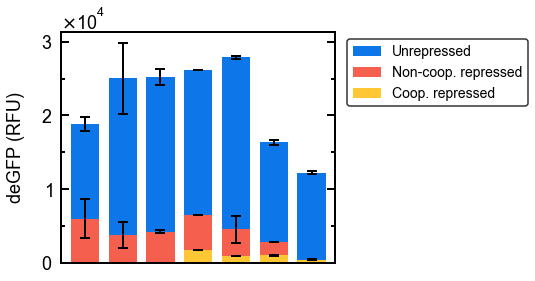

In [2]:
df=pd.read_csv(DIR_DATA+'repressor_platereader.csv',delimiter=',',index_col=0)

#############################
##### PLOT FLUORESCENCE #####
#############################

plt.close("all")

my_dpi=150

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'18','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

current_palette=sns.color_palette("deep", 4)
plt.rc('axes',prop_cycle=(cycler('color',current_palette)))
f, ax=plt.subplots()
plt.subplots_adjust(left=0.2,bottom=0.4,right=0.66,top=0.95)
    
######### CALL PLOTS #########

# Bar charts
length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.bar(ind,df['Unrepressed'],width,yerr=[df['Unrepressed err'],df['Unrepressed err']],
       align='edge', color='#0d76e8',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Unrepressed') 

ax.bar(ind,df['Non-cognate'],width,yerr=[df['Non-cognate err'],df['Non-cognate err']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Non-coop. repressed') 

ax.bar(ind,df['Cognate'],width,yerr=[df['Cognate err'],df['Cognate err']],
       align='edge', color='#FFC733',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Coop. repressed')

######### FORMAT #########
ax.set_xlim([-0.25,length])
ax.set_xticks(ind+width/2)
ax.set_xticklabels(df.index,rotation=90,ha='center',visible=False) #df2.index
ax.set_ylabel('deGFP (RFU)', labelpad=16)
ax.axhline(linewidth=2, color='k')     
ax.axvline(x=((10+width/2)+(11+width/2))/2,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(which='major', width=2, length=8,direction='in',top='false',right='true',bottom='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='true')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=9)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)

######### CALL LEGEND #########
leg=ax.legend(loc='upper right', fontsize=14,numpoints=1,frameon=True)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(1.5)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.73
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.savefig(DIR_PLOTS+'plot_coopPR_levels.pdf',dpi=my_dpi,transparent=True)#,bbox_inches='tight')
plt.show()


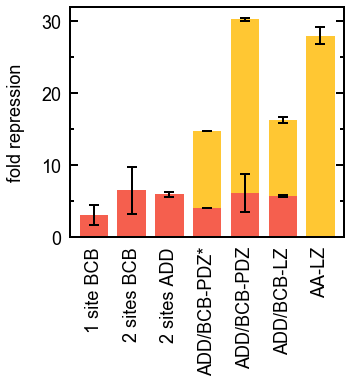

In [6]:
df=pd.read_csv(DIR_DATA+'repressor_platereader.csv',delimiter=',',index_col=0)

#############################
##### PLOT FLUORESCENCE #####
#############################

plt.close("all")

my_dpi=150

figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'18','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

current_palette=sns.color_palette("deep", 4)
plt.rc('axes',prop_cycle=(cycler('color',current_palette)))
f, ax=plt.subplots()
plt.subplots_adjust(left=0.2,bottom=0.4,right=0.66,top=0.95)
    
######### CALL PLOTS #########

# Bar charts
length=len(df.iloc[:,0])
width=0.75
ind=np.arange(length)

ax.bar(ind,df['FR cognate'],width,yerr=[df['FR cognate err'],df['FR cognate err']],
       align='edge', color='#FFC733',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Coop. repressed') #f55f4e red #0d76e8 blue


ax.bar(ind,df['FR non-cognate'],width,yerr=[df['FR non-cognate err'],df['FR non-cognate err']],
       align='edge', color='#f55f4e',linewidth=1.5,
       error_kw=dict(ecolor='k',lw=2,capsize=5,capthick=2),label='Non-coop. repressed') #f55f4e red #0d76e8 blue


######### FORMAT #########
ax.set_xlim([-0.25,length])
ax.set_xticks(ind+width/2)
ax.set_xticklabels(df.index,rotation=90,ha='center',visible=True) #df2.index
ax.set_ylabel('fold repression', labelpad=16)
ax.axhline(linewidth=2, color='k')     
ax.axvline(x=((10+width/2)+(11+width/2))/2,linewidth=2, color='k',ls='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2) 
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(which='major', width=2, length=8,direction='in',top='false',right='true',bottom='false')
ax.tick_params(which='minor', width=2, length=4,direction='in',top='true',right='true')
ax.tick_params(axis='x', pad=9)
ax.tick_params(axis='y', pad=9)

plt.savefig(DIR_PLOTS+'plot_coopPR_FR.pdf',dpi=my_dpi,transparent=True)
plt.show()

